<a href="https://colab.research.google.com/github/jeffkayser2/deep-learning-with-python-notebooks/blob/master/DL_Book_Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255



In [7]:
train_images_with_noise_channels =  np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model



In [9]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zero_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7024 - loss: 1.0128 - val_accuracy: 0.9154 - val_loss: 0.2783
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9122 - loss: 0.2859 - val_accuracy: 0.9389 - val_loss: 0.1995
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9469 - loss: 0.1706 - val_accuracy: 0.9556 - val_loss: 0.1480
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9604 - loss: 0.1236 - val_accuracy: 0.9597 - val_loss: 0.1390
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9497 - val_loss: 0.1668
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9797 - loss: 0.0644 - val_accuracy: 0.9603 - val_loss: 0.1315
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9673 - val_loss: 0.1198
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9896 - loss: 0.0330 - val_a

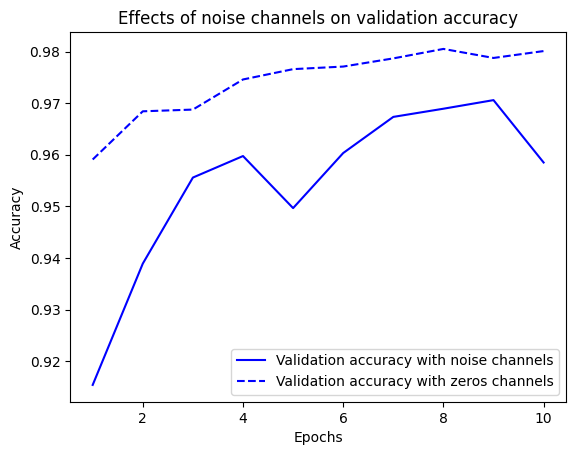

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
        label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
        label="Validation accuracy with zeros channels")
plt.title("Effects of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)



Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1044 - loss: 2.3318 - val_accuracy: 0.0961 - val_loss: 2.3076
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1198 - loss: 2.2965 - val_accuracy: 0.1037 - val_loss: 2.3132
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1279 - loss: 2.2895 - val_accuracy: 0.1032 - val_loss: 2.3174
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1381 - loss: 2.2770 - val_accuracy: 0.0990 - val_loss: 2.3249
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1557 - loss: 2.2605 - val_accuracy: 0.1026 - val_loss: 2.3353
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1739 - loss: 2.2365 - val_accuracy: 0.1021 - val_loss: 2.3503
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1868 - loss: 2.2158 - val_accuracy: 0.1004 - val_loss: 2.3639
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2061 - loss: 2.1837 - 

In [14]:
(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8368 - loss: 0.8184 - val_accuracy: 0.9572 - val_loss: 0.1444
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9630 - loss: 0.1283 - val_accuracy: 0.9675 - val_loss: 0.1251
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9743 - loss: 0.0929 - val_accuracy: 0.9699 - val_loss: 0.1347
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9797 - loss: 0.0714 - val_accuracy: 0.9692 - val_loss: 0.1536
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9836 - loss: 0.0602 - val_accuracy: 0.9693 - val_loss: 0.1839
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9854 - loss: 0.0543 - val_accuracy: 0.9731 - val_loss: 0.1871
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9885 - loss: 0.0431 - val_accuracy: 0.9721 - val_loss: 0.1829
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9897 - loss: 0.0413 - val_accu

In [15]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7422 - loss: 1.0235 - val_accuracy: 0.9006 - val_loss: 0.3613
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8997 - loss: 0.3685 - val_accuracy: 0.9148 - val_loss: 0.3101
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9110 - loss: 0.3232 - val_accuracy: 0.9169 - val_loss: 0.2947
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.3022 - val_accuracy: 0.9209 - val_loss: 0.2843
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9174 - loss: 0.2936 - val_accuracy: 0.9219 - val_loss: 0.2782
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9198 - loss: 0.2817 - val_accuracy: 0.9243 - val_loss: 0.2755
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9201 - loss: 0.2849 - val_accuracy: 0.9249 - val_loss: 0.2713
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.2755 - val_accuracy: 0.

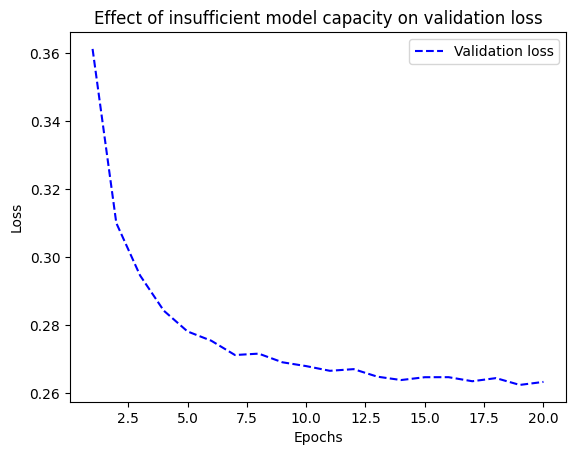

In [16]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8264 - loss: 0.6218 - val_accuracy: 0.9462 - val_loss: 0.1902
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9489 - loss: 0.1736 - val_accuracy: 0.9614 - val_loss: 0.1313
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9654 - loss: 0.1166 - val_accuracy: 0.9625 - val_loss: 0.1237
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9734 - loss: 0.0875 - val_accuracy: 0.9703 - val_loss: 0.1010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9798 - loss: 0.0676 - val_accuracy: 0.9699 - val_loss: 0.1022
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9824 - loss: 0.0569 - val_accuracy: 0.9708 - val_loss: 0.1039
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0479 - val_accuracy: 0.9715 - val_loss: 0.0992
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.

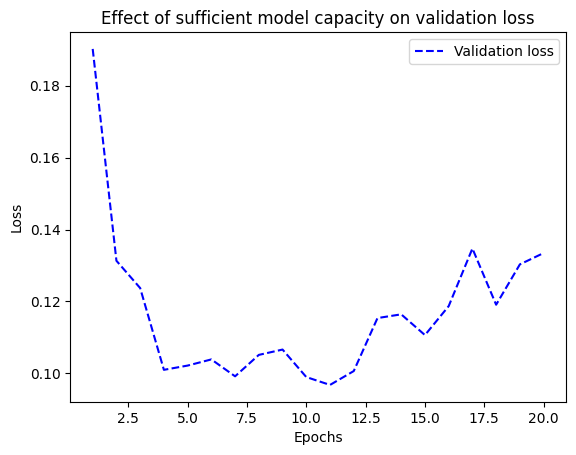

In [18]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()